In [53]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *

Setting environment for Precision WorkStation


No vtk
No vtkNot using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/media/yuncong/BstemAtlasData/CSHL_data_processed/MD585/MD585_prep2_thumbnail/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD589/MD589_prep2_thumbnail/MD589-N16-2015.07.30-17.03.43_MD589_3_0048_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD590/MD590_prep2_thumbnail/MD590-IHC17-2015.08.10-19.09.09_MD590_2_0050_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD591/MD591_prep2_thumbnail/MD591-IHC17-2015.08.28-04.23.47_MD591_1_0049_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD592/MD592_prep2_thumbnail/MD592-N16-2015.08.22-00.50.39_MD592_2_0047_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD593/MD593_prep2_thumbnail/MD593-N15-2015.08.21-16.53.02_MD593_3_0045_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD594/MD594_prep2_thumbnail/MD594-IHC16-2015.08.26-16.11.01_MD594_1_0046_prep2_thumbnail.tif
/media/

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/media/yuncong/BstemAtlasData/CSHL_data_processed/MD642/MD642_prep2_thumbnail/MD642-N14-2017.01.18-16.25.58_MD642_2_0041_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD657/MD657_prep2_thumbnail/MD657-N13-2017.02.22-14.33.34_MD657_3_0039_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD658/MD658_prep2_thumbnail/MD658-N18-2017.03.31-17.34.22_MD658_2_0053_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_thumbnail/MD662&661-F30-2017.06.05-14.49.48_MD661_1_0088_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/MD662/MD662_prep2_thumbnail/MD662&661-F35-2017.06.05-17.08.18_MD662_1_0103_prep2_thumbnail.tif
/media/yuncong/BstemAtlasData/CSHL_data_processed/ChatCryoJane201710/ChatCryoJane201710_prep2_thumbnail_Ntb/ChatCryoJane201710_slide1-S1_prep2_thumbnail_Ntb.tif


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
# raw_dir = '/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/'
raw_dir = '/media/yuncong/Seagate Backup Plus Drive/CHATM2'

In [4]:
# thumbnail_nt_dir = '/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Neurotrace/'
# create_if_not_exists(thumbnail_nt_dir)
# thumbnail_chat_dir = '/media/yuncong/BstemAtlasData/ChatCryoJane_thumbnails_Chat/'
# create_if_not_exists(thumbnail_chat_dir)

# Rename files

In [9]:
input_dir = raw_dir + '/ChatCryoJane201710_raw_Chat'
for fn in os.listdir(input_dir):
    new_fn = os.path.splitext(fn)[0] + '_Chat.tif'
    print fn, new_fn
    os.rename(os.path.join(input_dir, fn), os.path.join(input_dir, new_fn))

ChatCryoJane201710_slide1-S1_lossless.tif ChatCryoJane201710_slide1-S1_lossless_Chat.tif
ChatCryoJane201710_slide1-S2_lossless.tif ChatCryoJane201710_slide1-S2_lossless_Chat.tif
ChatCryoJane201710_slide1-S3_lossless.tif ChatCryoJane201710_slide1-S3_lossless_Chat.tif
ChatCryoJane201710_slide10-S1_lossless.tif ChatCryoJane201710_slide10-S1_lossless_Chat.tif
ChatCryoJane201710_slide10-S2_lossless.tif ChatCryoJane201710_slide10-S2_lossless_Chat.tif
ChatCryoJane201710_slide10-S3_lossless.tif ChatCryoJane201710_slide10-S3_lossless_Chat.tif
ChatCryoJane201710_slide11-S1_lossless.tif ChatCryoJane201710_slide11-S1_lossless_Chat.tif
ChatCryoJane201710_slide11-S2_lossless.tif ChatCryoJane201710_slide11-S2_lossless_Chat.tif
ChatCryoJane201710_slide11-S3_lossless.tif ChatCryoJane201710_slide11-S3_lossless_Chat.tif
ChatCryoJane201710_slide12-S1_lossless.tif ChatCryoJane201710_slide12-S1_lossless_Chat.tif
ChatCryoJane201710_slide12-S2_lossless.tif ChatCryoJane201710_slide12-S2_lossless_Chat.tif
ChatC

In [15]:
for fn in os.listdir(raw_dir):
    if 'CFP' in fn:
        new_fn = fn.replace('CFP', 'Ntb')
    else:
        new_fn = fn.replace('Alexa Fluor 568', 'Chat')
    print fn, new_fn
    os.rename(os.path.join(raw_dir, fn), os.path.join(raw_dir, new_fn))

Chat_slide1-S1-Alexa Fluor 568.tif Chat_slide1-S1-Chat.tif
Chat_slide1-S1-CFP.tif Chat_slide1-S1-Ntb.tif
Chat_slide1-S2-Alexa Fluor 568.tif Chat_slide1-S2-Chat.tif
Chat_slide1-S2-CFP.tif Chat_slide1-S2-Ntb.tif
Chat_slide1-S3-Alexa Fluor 568.tif Chat_slide1-S3-Chat.tif
Chat_slide1-S3-CFP.tif Chat_slide1-S3-Ntb.tif
Chat_slide10-S1-Alexa Fluor 568.tif Chat_slide10-S1-Chat.tif
Chat_slide10-S1-CFP.tif Chat_slide10-S1-Ntb.tif
Chat_slide10-S2-Alexa Fluor 568.tif Chat_slide10-S2-Chat.tif
Chat_slide10-S2-CFP.tif Chat_slide10-S2-Ntb.tif
Chat_slide10-S3-Alexa Fluor 568.tif Chat_slide10-S3-Chat.tif
Chat_slide10-S3-CFP.tif Chat_slide10-S3-Ntb.tif
Chat_slide11-S1-Alexa Fluor 568.tif Chat_slide11-S1-Chat.tif
Chat_slide11-S1-CFP.tif Chat_slide11-S1-Ntb.tif
Chat_slide2-S3-Alexa Fluor 568.tif Chat_slide2-S3-Chat.tif
Chat_slide2-S3-CFP.tif Chat_slide2-S3-Ntb.tif
Chat_slide20-S1-Alexa Fluor 568.tif Chat_slide20-S1-Chat.tif
Chat_slide20-S1-CFP.tif Chat_slide20-S1-Ntb.tif
Chat_slide20-S2-Alexa Fluor 568.tif

Chat_slide57-S3-Alexa Fluor 568.tif Chat_slide57-S3-Chat.tif
Chat_slide57-S3-CFP.tif Chat_slide57-S3-Ntb.tif
Chat_slide58-S1-Alexa Fluor 568.tif Chat_slide58-S1-Chat.tif
Chat_slide58-S1-CFP.tif Chat_slide58-S1-Ntb.tif
Chat_slide58-S2-Alexa Fluor 568.tif Chat_slide58-S2-Chat.tif
Chat_slide58-S2-CFP.tif Chat_slide58-S2-Ntb.tif
Chat_slide59-S1-Alexa Fluor 568.tif Chat_slide59-S1-Chat.tif
Chat_slide59-S1-CFP.tif Chat_slide59-S1-Ntb.tif
Chat_slide59-S2-Alexa Fluor 568.tif Chat_slide59-S2-Chat.tif
Chat_slide59-S2-CFP.tif Chat_slide59-S2-Ntb.tif
Chat_slide59-S3-Alexa Fluor 568.tif Chat_slide59-S3-Chat.tif
Chat_slide59-S3-CFP.tif Chat_slide59-S3-Ntb.tif
Chat_slide7-S3-CFP.tif Chat_slide7-S3-Ntb.tif
Chat_slide8-S1-Alexa Fluor 568.tif Chat_slide8-S1-Chat.tif
Chat_slide8-S1-CFP.tif Chat_slide8-S1-Ntb.tif
Chat_slide8-S2-Alexa Fluor 568.tif Chat_slide8-S2-Chat.tif
Chat_slide8-S2-CFP.tif Chat_slide8-S2-Ntb.tif
Chat_slide8-S3-Alexa Fluor 568.tif Chat_slide8-S3-Chat.tif
Chat_slide8-S3-CFP.tif Chat_sli

# Generate thumbnails - imagemagick

In [13]:
stack = 'CHATM2'

In [48]:
tb_prep0_dir = DataManager.get_image_dir_v2(stack=stack, prep_id=None, version='Ntb', resol='thumbnail')

In [49]:
create_if_not_exists(tb_prep0_dir)

'/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_thumbnail_Ntb'

In [122]:
filenames_to_sections, sections_to_filenames = DataManager.load_sorted_filenames(stack)

In [129]:
! rm -f /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_lossless_Ntb
! ln -s /media/yuncong/Seagate\ Backup\ Plus\ Drive/CHATM2/CHATM2_raw_Ntb /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_lossless_Ntb

In [128]:
! rm -f /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_lossless_Chat
! ln -s /media/yuncong/Seagate\ Backup\ Plus\ Drive/CHATM2/CHATM2_raw_CHAT /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_lossless_Chat

In [130]:
for fn in filenames_to_sections.keys()[:1]:
    print fn
    raw_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='Ntb', resol='lossless', fn=fn)
    tb_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='Ntb', resol='thumbnail', fn=fn)
    cmd = 'convert %(raw_fp)s -scale 3.125%% %(tb_fp)s' % {'raw_fp': raw_fp, 'tb_fp': tb_fp}
    execute_command(cmd)

CHATM2_slide86_2018_02_13-S2
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_lossless_Ntb/CHATM2_slide86_2018_02_13-S2_lossless_Ntb.tif -scale 3.125% /media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_thumbnail_Ntb/CHATM2_slide86_2018_02_13-S2_thumbnail_Ntb.tif


/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_thumbnail_Ntb/CHATM2_slide86_2018_02_13-S2_thumbnail_Ntb.tif


Not using image_cache.


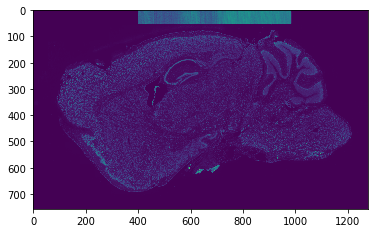

In [124]:
plt.imshow(DataManager.load_image_v2(stack=stack, prep_id=None, version='Ntb', resol='thumbnail', fn=fn))

# Generate thumbnails - use Gimp

In [18]:
def identify_shape(img_fp):
    return map(int, check_output("identify -format %%Wx%%H \"%s\"" % img_fp, shell=True).split('x'))

In [23]:
downsample = 32

for fn in os.listdir(raw_dir):
    raw_shape = identify_shape(os.path.join(raw_dir, fn))
    new_width = raw_shape[0] / downsample
    new_height = raw_shape[1] / downsample

    if 'Ntb' in fn: # neurotrace blue
        thumbnail_dir = thumbnail_nt_dir
    else:
        thumbnail_dir = thumbnail_chat_dir
    
    # Remove space because original names contain "Alexa Fluor 568".
    name = os.path.splitext(fn)[0].replace(" ", "")

    cmd = """gimp -i -b '(script-fu-simple-scale "%(raw_dir)s/%(fn)s" %(new_width)d %(new_height)d "%(thumbnail_dir)s/%(name)s.tif")' -b '(gimp-quit 0)'""" % \
        {'new_width': new_width, 'new_height':new_height, 'fn':fn, 'raw_dir':raw_dir, 'name': name, 'thumbnail_dir': thumbnail_dir}
    execute_command(cmd)

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide1-S1-Chat.tif" 583 872 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide1-S1-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide1-S1-Ntb.tif" 583 872 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide1-S1-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide1-S2-Chat.tif" 641 930 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide1-S2-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide1-S2-Ntb.tif" 641 930 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide1-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide1-S3-Chat.tif" 583 930 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide7-S1-Ntb.tif" 642 988 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide7-S1-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide7-S2-Chat.tif" 641 987 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide7-S2-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide7-S2-Ntb.tif" 641 987 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide7-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide11-S2-Ntb.tif" 699 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide11-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide11-S3-Chat.tif" 699 1046 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Ch

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide14-S1-Ntb.tif" 699 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide14-S1-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide14-S2-Chat.tif" 699 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide14-S2-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide14-S2-Ntb.tif" 699 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide14-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide14-S3-Chat.tif" 641 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide14-S3-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide14-S3-Ntb.tif" 641 1045 "/media/yuncong/BstemAtlasData/ChatCryoJan

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide22-S2-Ntb.tif" 700 1161 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide22-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide22-S3-Chat.tif" 699 1161 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide22-S3-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide22-S3-Ntb.tif" 699 1161 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide22-S3-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide23-S1-Chat.tif" 699 1161 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide23-S1-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide23-S1-Ntb.tif" 699 1161 "/media/yuncong/BstemAtlasData/ChatCryoJan

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide29-S2-Ntb.tif" 699 1219 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide29-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide29-S3-Chat.tif" 699 1218 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide29-S3-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide29-S3-Ntb.tif" 699 1218 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide29-S3-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide3-S1-Chat.tif" 641 930 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide3-S1-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide3-S1-Ntb.tif" 641 930 "/media/yuncong/BstemAtlasData/ChatCryoJane_Cha

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide35-S2-Chat.tif" 699 1276 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide35-S2-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide35-S2-Ntb.tif" 699 1276 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide35-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide35-S3-Chat.tif" 757 1334 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide35-S3-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide35-S3-Ntb.tif" 757 1334 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide35-S3-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide36-S1-Chat.tif" 699 1219 "/media/yuncong/BstemAtlasData/ChatCryoJa

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide41-S2-Chat.tif" 757 1334 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide41-S2-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide41-S2-Ntb.tif" 757 1334 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide41-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide41-S3-Chat.tif" 699 1449 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide41-S3-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide41-S3-Ntb.tif" 699 1449 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide41-S3-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide42-S1-Chat.tif" 756 1392 "/media/yuncong/BstemAtlasData/ChatCryoJa

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide5-S3-Ntb.tif" 641 987 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide5-S3-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide50-S1-Chat.tif" 758 1507 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide50-S1-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide50-S1-Ntb.tif" 758 1507 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide50-S1-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide50-S2-Chat.tif" 757 1450 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide50-S2-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide50-S2-Ntb.tif" 757 1450 "/media/yuncong/BstemAtlasData/ChatCryoJane_C

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide54-S1-Ntb.tif" 813 1450 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide54-S1-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide54-S2-Chat.tif" 813 1450 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide54-S2-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide54-S2-Ntb.tif" 813 1450 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide54-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide54-S3-Chat.tif" 813 1450 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide54-S3-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide54-S3-Ntb.tif" 813 1450 "/media/yuncong/BstemAtlasData/ChatCryoJan

gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide9-S1-Chat.tif" 699 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide9-S1-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide9-S1-Ntb.tif" 699 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide9-S1-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide9-S2-Chat.tif" 641 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide9-S2-Chat.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide9-S2-Ntb.tif" 641 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//Chat_slide9-S2-Ntb.tif")' -b '(gimp-quit 0)'
gimp -i -b '(script-fu-simple-scale "/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide9-S3-Chat.tif" 699 1045 "/media/yuncong/BstemAtlasData/ChatCryoJane_Chat//

# Generate thumbnails - use skimage
loading images is very slow.

In [3]:
img = imread('/media/yuncong/BstemAtlasData/ChatCryoJane/Chat_slide20-S2-CFP.tif')

In [5]:
img_rescaled = rescale(img, scale=0.03125)

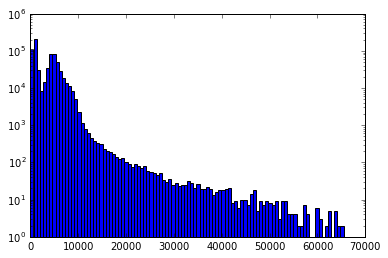

In [14]:
plt.hist(img.flatten(), bins=100, log=True);

In [16]:
metadata_cache['section_limits']['MD590']

array([ 82, 343])

# Rotate raw

In [121]:
for channel in ['CHAT', 'Ntb', 'AF']:
    for fn in filenames_to_sections.keys():
        raw_fp = '/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_%(channel)s/%(fn)s_lossless_%(channel)s.tif' % dict(channel=channel, fn=fn)
        rotated_raw_fp = '/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_%(channel)s/%(fn)s_lossless_%(channel)s.tif' % dict(channel=channel, fn=fn)
        create_parent_dir_if_not_exists(rotated_raw_fp)
        
    #     cmd = """gimp -i -b '(script-fu-rotate "%(raw_dir)s/%(fn)s" "%(raw_rotated_dir)s/%(name)s.tif")' -b '(gimp-quit 0)'""" % \
    #         {'fn':fn, 'raw_dir':raw_dir, 'name': name, 'raw_rotated_dir': raw_rotated_dir}

        # Gimp command above failed for some images for unknown reason. Had to use ImagemMagick.
        cmd = """convert "%(in_fp)s" -flip -rotate 270 "%(out_fp)s" """ % \
            {'in_fp': raw_fp, 'out_fp': rotated_raw_fp}
        execute_command(cmd)

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide86_2018_02_13-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide86_2018_02_13-S2_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide48_2018_01_22-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide48_2018_01_22-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide78_2018_02_14-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide78_2018_02_14-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide78_2018_02_14-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide07_2018_01_18-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide07_2018_01_18-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide07_2018_01_18-S1_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide07_2018_01_18-S1_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide49_2018_01_22-S1_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide49_2018_01_22-S1_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide76_2018_02_14-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide11_2018_01_18-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide11_2018_01_18-S2_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide11_2018_01_18-S1_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide11_2018_01_18-S1_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide50_2018_01_22-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide50_2018_01_22-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide50_2018_01_22-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide92_2018_02_13-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide92_2018_02_13-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide92_2018_02_13-S1_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide92_2018_02_13-S1_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide28_2018_01_18-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide28_2018_01_18-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide28_2018_01_18-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide66_2018_02_14-S1_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide66_2018_02_14-S1_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide74_2018_02_14-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide74_2018_02_14-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide74_2018_02_14-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide74_2018_02_14-S2_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide74_2018_02_14-S1_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide04_2018_01_18-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide04_2018_01_18-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide04_2018_01_18-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide04_2018_01_18-S2_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide16_2018_01_18-S1_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide16_2018_01_18-S1_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide16_2018_01_18-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide58_2018_01_22-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide58_2018_01_22-S2_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide25_2018_01_18-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide25_2018_01_18-S2_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide25_2018_01_18-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide25_2018_01_18-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide17_2018_01_18-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide36_2018_01_22-S1_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide36_2018_01_22-S1_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide45_2018_01_22-S3_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide45_2018_01_22-S3_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide17_2018_01_18-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_CHAT/CHATM2_slide17_2018_01_18-S2_lossless_CHAT.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_CHAT/CHATM2_slide14_2018_01_18-S2_lossless_CHAT.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide98_2018_02_13-S2_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide98_2018_02_13-S2_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide98_2018_02_13-S3_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide98_2018_02_13-S3_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide12_2018_01_18-S1_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide12_2018_01_18-S1_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide12_2018_01_18-S2_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide82_2018_02_14-S3_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide82_2018_02_14-S3_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide84_2018_02_14-S2_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide84_2018_02_14-S2_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide84_2018_02_14-S3_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide84_2018_02_14-S3_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide51_2018_01_22-S2_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide08_2018_01_18-S1_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide08_2018_01_18-S1_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide08_2018_01_18-S3_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide08_2018_01_18-S3_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide08_2018_01_18-S2_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide08_2018_01_18-S2_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide86_2018_02_13-S3_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide15_2018_01_18-S1_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide15_2018_01_18-S1_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide76_2018_02_14-S1_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide76_2018_02_14-S1_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide33_2018_01_20-S1_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide33_2018_01_20-S1_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide33_2018_01_20-S2_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide88_2018_02_13-S3_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide88_2018_02_13-S3_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide13_2018_01_19-S2_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide13_2018_01_19-S2_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide13_2018_01_19-S3_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide13_2018_01_19-S3_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide13_2018_01_19-S1_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/

convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide55_2018_01_22-S3_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide55_2018_01_22-S3_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide104_2018_02_13-S3_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide104_2018_02_13-S3_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide55_2018_01_22-S1_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_Ntb/CHATM2_slide55_2018_01_22-S1_lossless_Ntb.tif" 
convert "/media/yuncong/Seagate Backup Plus Drive/CHATM2/CHATM2_raw_Ntb/CHATM2_slide104_2018_02_13-S1_lossless_Ntb.tif" -flip -rotate 270 "/media/yuncong/Seagate Backup Plus Drive/CHATM2_rotated/CHATM2_lossless_N

KeyboardInterrupt: 

# Rotate

In [ ]:
#! mogrify -rotate 90 -flip -path ChatCryoJane_Chat_rotated ChatCryoJane_Chat/*

In [78]:
# raw_dir = '/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_lossless_Ntb/'
raw_nt_dir = '/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_lossless_Ntb/'
# create_if_not_exists(raw_nt_dir)
raw_chat_dir = '/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_lossless_Chat/'
# create_if_not_exists(raw_chat_dir)

In [79]:
thumbnail_nt_dir = DataManager.get_image_dir_v2(stack=stack, prep_id=None, version='Ntb', resol='thumbnail')

In [80]:
thumbnail_nt_dir

'/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_thumbnail_Ntb'

In [85]:
for fn in filenames_to_sections.keys()[:1]:
    
    tb_nt_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=None, version='Ntb', resol='thumbnail', fn=fn)

#     cmd = """gimp -i -b '(script-fu-rotate "%(raw_dir)s/%(fn)s" "%(raw_rotated_dir)s/%(name)s.tif")' -b '(gimp-quit 0)'""" % \
#         {'fn':fn, 'raw_dir':raw_dir, 'name': name, 'raw_rotated_dir': raw_rotated_dir}

    # Gimp command above failed for some images for unknown reason. Had to use ImagemMagick.
    cmd = """convert "%(in_fp)s" -flip -rotate 270 "%(out_fp)s" """ % \
        {'in_fp': tb_nt_fp, 'out_fp': tb_nt_fp}
    execute_command(cmd)

convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_thumbnail_Ntb/CHATM2_slide86_2018_02_13-S2_thumbnail_Ntb.tif" -flip -rotate 270 "/media/yuncong/BstemAtlasData/CSHL_data_processed/CHATM2/CHATM2_thumbnail_Ntb/CHATM2_slide86_2018_02_13-S2_thumbnail_Ntb.tif" 


In [9]:
import re

In [ ]:
for fn in os.listdir(raw_dir):
    
    s = re.search("Chat_(.*)-(Chat|Ntb).tif", fn)
    section_name_minus_stack, channel = s.groups()[:2] 
    new_filename = 'ChatCryoJane201710_' + section_name_minus_stack + '_lossless.tif'
    
    if channel == 'Ntb': # neurotrace blue
        raw_rotated_dir = raw_nt_dir
    else: # Chat
        raw_rotated_dir = raw_chat_dir
        
#     cmd = """gimp -i -b '(script-fu-rotate "%(raw_dir)s/%(fn)s" "%(raw_rotated_dir)s/%(name)s.tif")' -b '(gimp-quit 0)'""" % \
#         {'fn':fn, 'raw_dir':raw_dir, 'name': name, 'raw_rotated_dir': raw_rotated_dir}

    # Gimp command above failed for some images for unknown reason. Had to use ImagemMagick.
    cmd = """convert "%(raw_dir)s/%(fn)s" -flip -rotate 270 -compress LZW "%(raw_rotated_dir)s/%(new_filename)s" """ % \
        {'fn':fn, 'raw_dir':raw_dir, 'new_filename': new_filename, 'raw_rotated_dir': raw_rotated_dir}
    execute_command(cmd)

convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide1-S1-Chat.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Chat//ChatCryoJane201710_slide1-S1_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide1-S1-Ntb.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Ntb//ChatCryoJane201710_slide1-S1_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide1-S2-Chat.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Chat//ChatCryoJane201710_slide1-S2_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide1-S2-Ntb.tif" -flip -rotate 270 -compress LZW "/media/

convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide6-S2-Ntb.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Ntb//ChatCryoJane201710_slide6-S2_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide6-S3-Chat.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Chat//ChatCryoJane201710_slide6-S3_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide6-S3-Ntb.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Ntb//ChatCryoJane201710_slide6-S3_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide60-S1-Chat.tif" -flip -rotate 270 -compress LZW "/media/

convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide2-S2-Ntb.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Ntb//ChatCryoJane201710_slide2-S2_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide22-S1-Chat.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Chat//ChatCryoJane201710_slide22-S1_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide24-S2-Ntb.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Ntb//ChatCryoJane201710_slide24-S2_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide27-S1-Chat.tif" -flip -rotate 270 -compress LZW "/me

convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide15-S3-Chat.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Chat//ChatCryoJane201710_slide15-S3_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide15-S3-Ntb.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Ntb//ChatCryoJane201710_slide15-S3_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide16-S1-Chat.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Chat//ChatCryoJane201710_slide16-S1_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide16-S1-Ntb.tif" -flip -rotate 270 -compress LZW "

convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide22-S2-Chat.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Chat//ChatCryoJane201710_slide22-S2_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide22-S2-Ntb.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Ntb//ChatCryoJane201710_slide22-S2_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide22-S3-Chat.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Chat//ChatCryoJane201710_slide22-S3_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide22-S3-Ntb.tif" -flip -rotate 270 -compress LZW "

convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide27-S2-Ntb.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Ntb//ChatCryoJane201710_slide27-S2_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide27-S3-Chat.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Chat//ChatCryoJane201710_slide27-S3_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide27-S3-Ntb.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Ntb//ChatCryoJane201710_slide27-S3_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide28-S1-Chat.tif" -flip -rotate 270 -compress LZW "/

convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide31-S3-Chat.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Chat//ChatCryoJane201710_slide31-S3_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide31-S3-Ntb.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Ntb//ChatCryoJane201710_slide31-S3_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide32-S1-Chat.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Chat//ChatCryoJane201710_slide32-S1_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide32-S1-Ntb.tif" -flip -rotate 270 -compress LZW "

convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide36-S3-Ntb.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Ntb//ChatCryoJane201710_slide36-S3_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide37-S1-Chat.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Chat//ChatCryoJane201710_slide37-S1_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide37-S1-Ntb.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Ntb//ChatCryoJane201710_slide37-S1_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide37-S2-Chat.tif" -flip -rotate 270 -compress LZW "/

convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide41-S1-Chat.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Chat//ChatCryoJane201710_slide41-S1_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide41-S1-Ntb.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Ntb//ChatCryoJane201710_slide41-S1_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide41-S2-Chat.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Chat//ChatCryoJane201710_slide41-S2_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide41-S2-Ntb.tif" -flip -rotate 270 -compress LZW "

convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide46-S1-Ntb.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Ntb//ChatCryoJane201710_slide46-S1_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide46-S2-Chat.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Chat//ChatCryoJane201710_slide46-S2_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide46-S2-Ntb.tif" -flip -rotate 270 -compress LZW "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw_Ntb//ChatCryoJane201710_slide46-S2_lossless.tif" 
convert "/media/yuncong/BstemAtlasData/CSHL_data/ChatCryoJane201710/ChatCryoJane201710_raw//Chat_slide46-S3-Chat.tif" -flip -rotate 270 -compress LZW "/

# Tune contrast

In [3]:
stack = 'ChatCryoJane201710'

In [10]:
# for fn in metadata_cache['valid_filenames'][stack]:
img = DataManager.load_image_v2(stack=stack, prep_id=2, section=100, version='Ntb')

In [13]:
display_image(img[10000:12000, 10000:12000])

/usr/local/lib/python2.7/dist-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from uint16 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


/home/yuncong/Brain/preprocess/tmp.jpg

In [14]:
img[10000:12000, 10000:12000].max()

62776

In [19]:
2**16-1

65535

In [21]:
display_image(rescale_intensity_v2(img[10000:12000, 10000:12000], 65535, 0))

/home/yuncong/Brain/preprocess/tmp.jpg